# Phone Tones

In [1]:
from synthingie import Audio, Module, score
SAMPLERATE = 48000
FRAMESIZE = 1024

mod = Module(SAMPLERATE, FRAMESIZE)

## Dial Tone

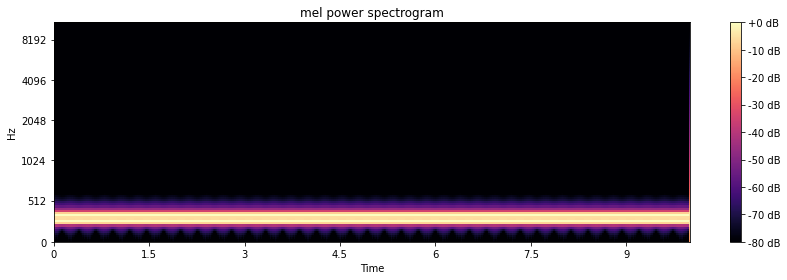

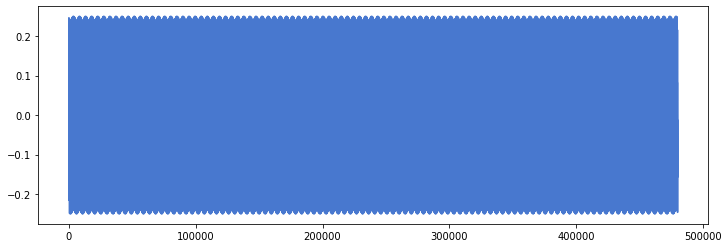

In [2]:
dial_tone = (mod.sin(440) + mod.sin(350)) * 0.125

mod.render(dial_tone, 10).display()

## Ringing Tone

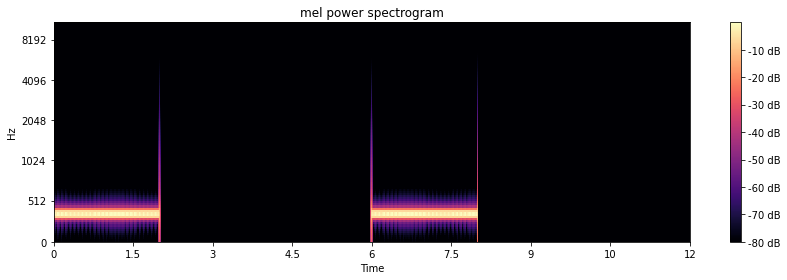

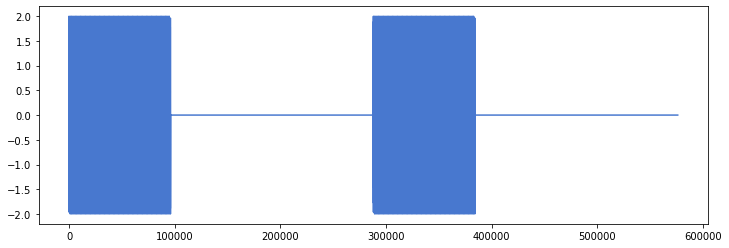

In [3]:
gate = (mod.metro(1).cumsum() -1) % 6 < 2
tone = mod.sin(480) + mod.sin(440)
ringing = tone * gate
mod.render(ringing, 12).display()

# Pulse dialing

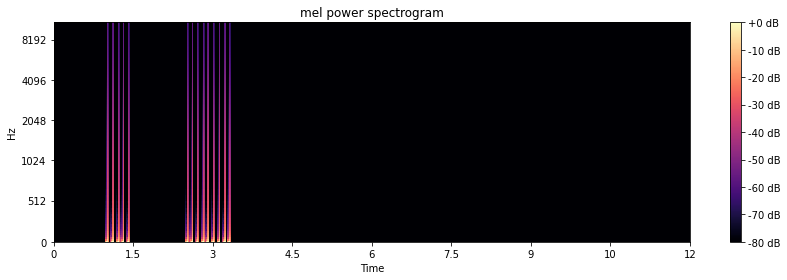

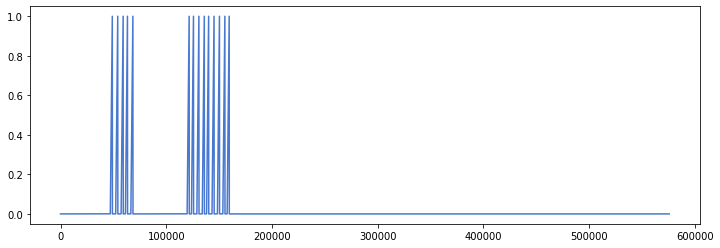

In [4]:
pulse = mod.line()
def dial_digit(number):
    return score.Sequence([
        score.Call(pulse.set, 
            (1., 0.), (1., 0.04), (0., 0.)
        ),
        score.Wait(0.1)
    ] * number)

sc = score.Wait(1) + dial_digit(5) + score.Wait(1) + dial_digit(9)
mod.render(pulse, 12, score=sc).display()

# Putting it all together

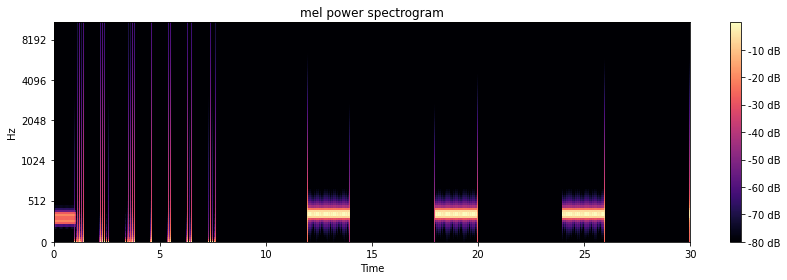

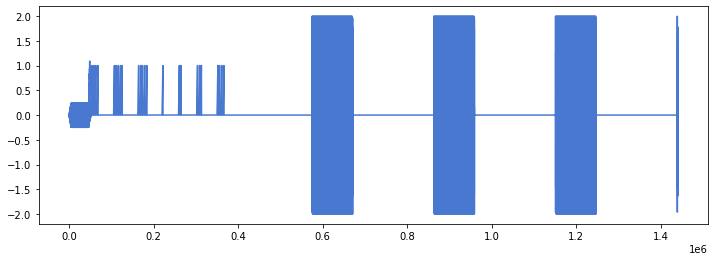

In [5]:
dial_tone_env = mod.line()
ringing_env = mod.line()
signal = dial_tone * dial_tone_env + ringing * ringing_env + pulse

def dial_number(phone_number):
    steps = []
    for digit in phone_number:
        digit = int(digit)
        steps.append(dial_digit(digit))
        steps.append(score.Wait(0.7))
    return score.Sequence(steps)
                     
sc = \
    score.Call(dial_tone_env.set, (1, 0.1)) + \
    score.Wait(1) + \
    score.Call(dial_tone_env.set, (0, 0.1)) + \
    dial_number("5551234") + \
    score.Wait(2) + \
    score.Call(ringing_env.set, (1, 0.1))
mod.render(signal, 30, score=sc).display()                   